In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pathlib import Path
import datetime
import glob as gl

In [80]:
## example data path
DATA_PATH = Path("/store/projects/fallki/MessdatenFeldversuch/203 B4")

In [81]:
# collect all file in Data Path
runFiles = []
runFiles += DATA_PATH.glob(f'*.bin')
print(([f.stem for f in runFiles]))

['2022-09-11_06-00-00', '2022-09-13_05-00-00', '2022-09-15_00-00-00', '2022-09-09_19-00-00', '2022-09-10_07-00-00', '2022-09-12_04-00-00', '2022-09-14_01-00-00', '2022-09-16_02-00-00', '2022-09-13_04-00-00', '2022-09-11_07-00-00', '2022-09-09_18-00-00', '2022-09-15_01-00-00', '2022-09-12_05-00-00', '2022-09-10_06-00-00', '2022-09-16_03-00-00', '2022-09-14_00-00-00', '2022-09-15_02-00-00', '2022-09-13_07-00-00', '2022-09-11_04-00-00', '2022-09-16_00-00-00', '2022-09-14_03-00-00', '2022-09-12_06-00-00', '2022-09-10_05-00-00', '2022-09-15_03-00-00', '2022-09-11_05-00-00', '2022-09-13_06-00-00', '2022-09-14_02-00-00', '2022-09-16_01-00-00', '2022-09-10_04-00-00', '2022-09-12_07-00-00', '2022-09-14_05-00-00', '2022-09-16_06-00-00', '2022-09-10_03-00-00', '2022-09-12_00-00-00', '2022-09-15_04-00-00', '2022-09-11_02-00-00', '2022-09-13_01-00-00', '2022-09-16_07-00-00', '2022-09-14_04-00-00', '2022-09-12_01-00-00', '2022-09-10_02-00-00', '2022-09-15_05-00-00', '2022-09-13_00-00-00', '2022-09-1

In [82]:
len(runFiles)

169

In [86]:
for x in runFiles:
    #if x == "/store/projects/fallki/MessdatenFeldversuch/206 B5/2022-09-14_18-00-00.bin":
        print(x)

/store/projects/fallki/MessdatenFeldversuch/206 B5/2022-09-11_06-00-00.bin
/store/projects/fallki/MessdatenFeldversuch/206 B5/2022-09-13_05-00-00.bin
/store/projects/fallki/MessdatenFeldversuch/206 B5/2022-09-15_00-00-00.bin
/store/projects/fallki/MessdatenFeldversuch/206 B5/2022-09-09_19-00-00.bin
/store/projects/fallki/MessdatenFeldversuch/206 B5/2022-09-10_07-00-00.bin
/store/projects/fallki/MessdatenFeldversuch/206 B5/2022-09-12_04-00-00.bin
/store/projects/fallki/MessdatenFeldversuch/206 B5/2022-09-14_01-00-00.bin
/store/projects/fallki/MessdatenFeldversuch/206 B5/2022-09-16_02-00-00.bin
/store/projects/fallki/MessdatenFeldversuch/206 B5/2022-09-13_04-00-00.bin
/store/projects/fallki/MessdatenFeldversuch/206 B5/2022-09-11_07-00-00.bin
/store/projects/fallki/MessdatenFeldversuch/206 B5/2022-09-09_18-00-00.bin
/store/projects/fallki/MessdatenFeldversuch/206 B5/2022-09-15_01-00-00.bin
/store/projects/fallki/MessdatenFeldversuch/206 B5/2022-09-12_05-00-00.bin
/store/projects/fallki/Me

In [62]:
# function to load a binary file into a pd.DataFrame

def readBinaryToPandas(filepath, dt=np.dtype('int16'), datetime_fmt=True):
    try:
        df = pd.DataFrame(np.fromfile(filepath, dtype=dt, count=-1, sep=''))
        
    except IOError:
        print("Error while opening the file!")
        
    #We need to reorder data & and add time from filename                   
    x = df.iloc[0::3].to_numpy().reshape(-1)
    y = df.iloc[1::3].to_numpy().reshape(-1)
    z = df.iloc[2::3].to_numpy().reshape(-1)
    
    # I use min_len here, because it appears that sometimes the data is not uploaded entirely
    # In such a case we might have differing numbers of x,y and z values. This way I make sure
    # we are still able to parse every point that has been uploaded completely into a pandas dataframe.
    min_len = np.min([len(x),len(y),len(z)])
    samples_per_second = 1600
    
    print(f"{min_len} rows")
    
    df = pd.DataFrame({'x': x[:min_len],'y': y[:min_len],'z': z[:min_len]})
    df.name = filepath.stem
    
    if datetime_fmt:
        start = datetime.datetime.strptime(filepath.stem,'%Y-%m-%d_%H-%M-%S')
        end = start + datetime.timedelta(seconds=(1 / samples_per_second) * (min_len - 1))
        df['time'] = pd.date_range(start, end, freq="0.625ms")
    else:
        start = 0
        end = (1 / samples_per_second) * (min_len - 1)
        df['time'] = np.linspace(0, end, min_len)
    
    return df


In [63]:
#runFiles

In [64]:
Real_data = readBinaryToPandas(runFiles[59])

5772030 rows


In [65]:
Real_data

,x,y,z,time
0,-1,8,1014,2022-09-13 18:00:00.000000
1,0,9,1018,2022-09-13 18:00:00.000625
2,0,9,1016,2022-09-13 18:00:00.001250
3,-1,6,1016,2022-09-13 18:00:00.001875
4,-3,5,1018,2022-09-13 18:00:00.002500
...,...,...,...,...
5772025,-3,4,1018,2022-09-13 19:00:07.515625
5772026,0,4,1020,2022-09-13 19:00:07.516250
5772027,3,8,1014,2022-09-13 19:00:07.516875
5772028,-1,10,1010,2022-09-13 19:00:07.517500


Text(0.5, 1.0, 'A single plot')

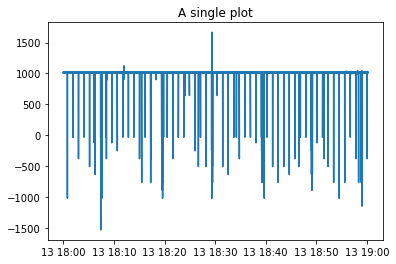

In [66]:
#single plot
fig, ax = plt.subplots()
ax.plot(Real_data['time'],Real_data['z'])
ax.set_title('A single plot')

In [71]:
plot1= Real_data[(Real_data['time'] >= '2022-09-13 18:00:00.000000') & (Real_data['time'] <= '2022-09-13 18:15:00.000000')]
plot2= Real_data[(Real_data['time'] > '2022-09-13 18:15:00.000000') & (Real_data['time'] <= '2022-09-13 18:30:00.000000')]
plot3= Real_data[(Real_data['time'] > '2022-09-13 18:30:00.000000') & (Real_data['time'] <= '2022-09-13 18:45:00.000000')]
plot4= Real_data[(Real_data['time'] > '2022-09-13 18:45:00.000000') & (Real_data['time'] <= '2022-09-13 18:59:41.924375')]

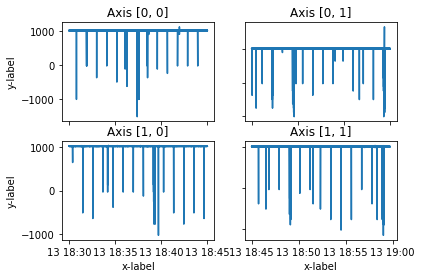

In [72]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(plot1['time'],plot1['z'], 'tab:blue')
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(plot2['time'], plot2['z'], 'tab:blue')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(plot3['time'], plot3['z'], 'tab:blue')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(plot4['time'], plot4['z'], 'tab:blue')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()